In [13]:
import os

In [14]:
import ROOT as R

In [15]:
R.gStyle.SetGridColor(16)

In [16]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracker/plots'
FILES_IN = 'sublayer_histos_vtxb_v2.root'

In [17]:
file_in = R.TFile(os.path.join(DIR_IN, FILE_IN))

### Reading histograms

In [18]:
histos = [file_in.Get(hname).Clone() for hname in ['sublayerDPhi_closest_mu_{0:d}'.format(i) for i in range(4)]]

In [19]:
for h in histos:
    h.SetDirectory(0)

In [8]:
def find_integral_bin(h, fraction):
    """Find the bin with the specific integral fraction"""
    nbins = h.GetNbinsX()
    integral = h.Integral()
    for iBin in range(nbins):
        binId = iBin+1
        bin_integral = h.Integral(1, binId)/integral
        if bin_integral > fraction:
            return binId
    return 0

### Drawing histograms

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


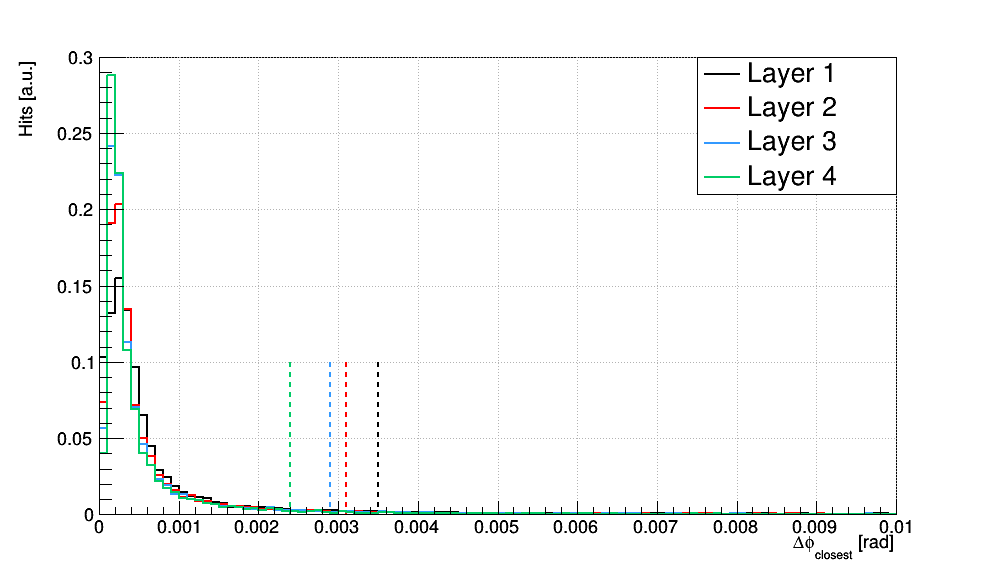

In [21]:
C = R.TCanvas('canvas', '', 1000, 600)
C.SetGrid()
colors = [1, 2, R.kAzure+1, R.kTeal+2]
legNames = ['Layer {0:d}'.format(l) for l in range(1,4+1)]
leg = R.TLegend(0.7, 0.9-0.06*4, 0.9,0.9)
threshold_values = {}
for iH, h_ori in enumerate(histos):
    h = h_ori.Clone()
    R.SetOwnership(h, False)
    total = h.Integral()
    h.Scale(1.0/total)
    drawopt = 'hist' if iH == 0 else 'same hist'
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    h.GetXaxis().SetRangeUser(0, 0.01)
    h.GetYaxis().SetRangeUser(0, 0.3)
    h.Draw(drawopt)
    leg.AddEntry(h, legNames[iH], 'l')
    thresholds = {thr: find_integral_bin(h, thr) for thr in [0.95]}
    threshold_values[iH] = thresholds
    for frac, binId in thresholds.items():
        x = h.GetXaxis().GetBinUpEdge(binId)
        l = R.TLine(x, 0, x, ((1.0-frac)/0.15) * 0.3)
        l.SetLineColor(colors[iH])
        l.SetLineWidth(2)
        l.SetLineStyle(7)
        R.SetOwnership(l, False)
        l.Draw()
leg.Draw()
C.RedrawAxis()
C.Draw()
# C.SaveAs(os.path.join(DIR_IN, 'sublayer_dPhi_vtxe_mu.pdf'))

In [22]:
threshold_values

{0: {0.95: 35}, 1: {0.95: 31}, 2: {0.95: 29}, 3: {0.95: 24}}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_04_21_tracker/plots/sublayer_dPhi_vtxe_bib.pdf has been created


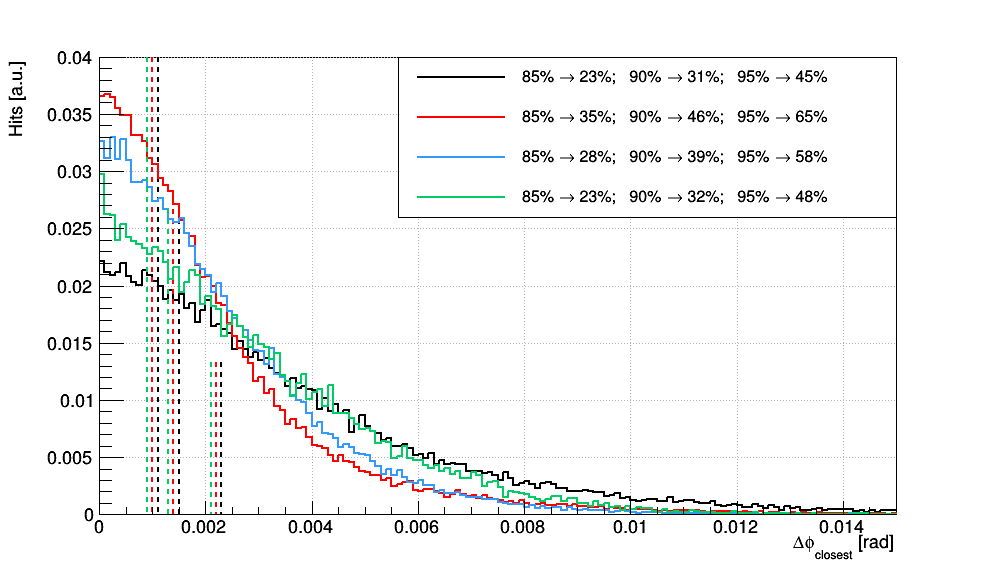

In [107]:
C = R.TCanvas('canvas', '', 1000, 600)
C.SetGrid()
colors = [1, 2, R.kAzure+1, R.kTeal+2]
legNames = ['Layer {0:d}'.format(l) for l in range(1,4+1)]
leg = R.TLegend(0.4, 0.9-0.07*4, 0.9,0.9)
for iH, h_ori in enumerate(histos):
    h = h_ori.Clone()
    R.SetOwnership(h, False)
    total = h.Integral()
    h.Scale(1.0/total)
    drawopt = 'hist' if iH == 0 else 'same hist'
    h.SetLineColor(colors[iH])
    h.SetLineWidth(2)
    h.GetXaxis().SetRangeUser(0, 0.015)
    h.GetYaxis().SetRangeUser(0, 0.04)
    h.Draw(drawopt)
    thresholds = threshold_values[iH]
    fractions = ['{0:.0f}% #rightarrow {1:.0f}%'.format(thr*100, h.Integral(1, thresholds[thr]) * 100) for thr in [0.85, 0.9, 0.95]]
    leg.AddEntry(h, ';   '.join(fractions), 'l')
    for frac, binId in thresholds.items():
        x = h.GetXaxis().GetBinUpEdge(binId)
        l = R.TLine(x, 0, x, ((1.0-frac)/0.15) * 0.04)
        l.SetLineColor(colors[iH])
        l.SetLineWidth(2)
        l.SetLineStyle(7)
        R.SetOwnership(l, False)
        l.Draw()
leg.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'sublayer_dPhi_vtxe_bib.pdf'))